In [1]:
import zipfile
!unzip /content/drive/MyDrive/train.csv.zip

Archive:  /content/drive/MyDrive/train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/train.csv")

In [5]:
y = df["label"]

In [6]:
x = df.iloc[:,1:]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

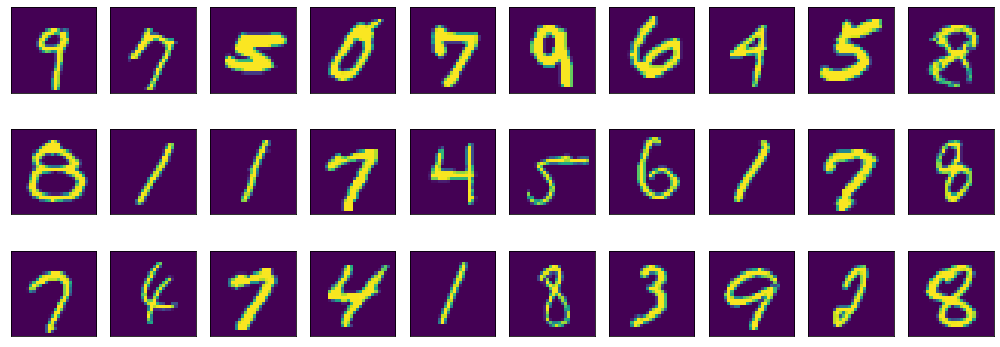

In [8]:
plt.figure(figsize=(14,12))


for digit_num in range(0,30):
  plt.subplot(7,10,digit_num+1)
  grid_data = x_train.iloc[digit_num].values.reshape(28,28)
  plt.imshow(grid_data, interpolation = "none")
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [10]:
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(normalized_x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
clf_2 = SVC(kernel="sigmoid",random_state=0)

In [12]:
clf_2.fit(normalized_x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
clf_3 = SVC(kernel="poly",random_state=0)

In [14]:
clf_3.fit(normalized_x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
print(f"Training Score using RBF Kernel: {clf.score(normalized_x_train,y_train)}")
print(f"Training Score using Sigmoid Kernel : {clf_2.score(normalized_x_train,y_train)}")
print(f"Training Score using Polynomial Kernel: {clf_3.score(normalized_x_train,y_train)}")

Training Score using RBF Kernel: 0.9896130952380953
Training Score using Sigmoid Kernel : 0.7816964285714286
Training Score using Polynomial Kernel: 0.9994940476190476


###Three Models with different Kernels

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [17]:
y_pred = clf.predict(normalized_x_test)

In [18]:
y_pred_2 = clf_2.predict(normalized_x_test)

In [19]:
y_pred_3=clf_3.predict(normalized_x_test)

In [20]:
print("Test Accuracy and Confusion Matrix Using Classifier with RBF kernel")
accuracy_score(y_test,y_pred)

Test Accuracy and Confusion Matrix Using Classifier with RBF kernel


0.9741666666666666

In [21]:
confusion_matrix(y_test,y_pred)

array([[829,   0,   2,   0,   1,   3,   2,   0,   2,   1],
       [  0, 921,   2,   1,   3,   0,   0,   1,   2,   1],
       [  2,   0, 814,   4,   6,   0,   2,   3,   3,   1],
       [  0,   3,   7, 858,   1,  11,   2,   4,   4,   1],
       [  1,   0,   1,   0, 777,   1,   2,   0,   0,  11],
       [  2,   0,   1,   9,   1, 730,   5,   0,   4,   0],
       [  2,   1,   4,   0,   2,   4, 843,   0,   1,   0],
       [  0,   4,   5,   0,   6,   0,   0, 840,   0,   8],
       [  0,   2,   4,   4,   3,   6,   1,   2, 780,   6],
       [  2,   2,   0,  10,  13,   2,   0,   8,   2, 791]])

In [22]:
print("Test Accuracy and Confusion Matrix Using Classifier with sigmoid kernel")
accuracy_score(y_test,y_pred_2)

Test Accuracy and Confusion Matrix Using Classifier with sigmoid kernel


0.7753571428571429

In [23]:
confusion_matrix(y_test,y_pred_2)

array([[742,   2,   3,   7,   3,  58,  17,   2,   3,   3],
       [  0, 901,   3,   7,   1,   9,   3,   0,   7,   0],
       [ 25,  68, 572,  17,  35,  20,  32,  15,  41,  10],
       [ 12,  42,  12, 634,   5, 108,  10,  17,  32,  19],
       [  1,   4,   9,   3, 677,  14,   6,   2,   6,  71],
       [ 37,  74,   3, 104,  18, 442,  18,   3,  33,  20],
       [ 17,  17,  39,   2,  12,  31, 736,   0,   3,   0],
       [  2,  36,  16,   2,  24,  12,   0, 676,   3,  92],
       [ 18,  93,  13,  19,   8,  84,   8,   3, 534,  28],
       [  5,  11,  10,  18,  62,  36,   1,  77,  11, 599]])

In [24]:
print("Test Accuracy and Confusion Matrix Using Classifier with Polynomial kernel")
accuracy_score(y_test,y_pred_3)

Test Accuracy and Confusion Matrix Using Classifier with Polynomial kernel


0.9735714285714285

In [25]:
confusion_matrix(y_test,y_pred_3)

array([[832,   0,   1,   2,   0,   2,   1,   0,   0,   2],
       [  0, 921,   3,   0,   2,   0,   0,   1,   3,   1],
       [  3,   1, 818,   4,   4,   0,   1,   1,   2,   1],
       [  1,   3,   6, 853,   1,  12,   1,   6,   4,   4],
       [  1,   0,   2,   0, 769,   1,   3,   0,   0,  17],
       [  2,   1,   1,  11,   1, 726,   6,   0,   3,   1],
       [  3,   1,   2,   0,   2,   4, 844,   0,   1,   0],
       [  0,   3,   5,   0,   4,   0,   0, 845,   0,   6],
       [  3,   0,   4,   5,   2,   7,   1,   2, 779,   5],
       [  1,   2,   0,   7,  14,   3,   1,   8,   3, 791]])

###Thus by observing the above results we can say that the clf produces good results. So we will use the clf classifier for predicting further results.

Further we can reduce the dimensionality using Principal Component Analysis(PCA).

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
pca_X_train = pca.fit_transform(normalized_x_train)
pca_X_test = pca.transform(normalized_x_test)

print(f'{pca.explained_variance_} \n Number of PCA Vectors = {len(pca.explained_variance_)}' )

[20.55772093 15.15507884 12.98781642 11.31262242 10.34748883  9.0881205
  6.90209136  6.12772176  5.87923554  4.96404233  4.43404477  4.35315465
  3.6201981   3.56467427  3.36666337  3.13708356  2.7716044   2.70429438
  2.51190766  2.436562    2.26945571  2.11725946  2.03452496  1.92084696
  1.8681936   1.78434046  1.71945259  1.64237423  1.57035346  1.45985302
  1.39287142  1.35496421  1.27100758  1.24378125  1.1872732   1.13975383
  1.08289516  1.02639392  1.0054748   0.98531592  0.95322594  0.93722261
  0.88015934  0.84078398  0.81349484  0.79310976  0.76379686  0.73973725
  0.70747333  0.67566534  0.66661104  0.6531163   0.62194144  0.61021602
  0.59039852  0.57271469  0.56125442  0.53899072  0.53548533  0.52084533
  0.50714123  0.50531476  0.47955702  0.46641313  0.45564032  0.43193197
  0.42685353  0.41532475  0.40861191  0.39936582  0.39480045  0.38607473
  0.37102791  0.36254964  0.3516081   0.34593012  0.33680486  0.32451502
  0.31087542  0.30167136  0.2977455   0.29721378  0.

In [28]:
#applying classifier's to pca_X_train

clf.fit(pca_X_train,y_train)
clf_2.fit(pca_X_train,y_train)
clf_3.fit(pca_X_train,y_train)
print(f"Training Score with Principal Component Analysis using RBF kernel : {clf.score(pca_X_train,y_train)}")
print(f"Training Score with Principal Component Analysis using sigmoid kernel : {clf_2.score(pca_X_train,y_train)}")
print(f"Training Score without Principal Component Analysis using polynomial kernel : {clf_3.score(pca_X_train,y_train)}")

Training Score with Principal Component Analysis using RBF kernel : 0.9922321428571429
Training Score with Principal Component Analysis using sigmoid kernel : 0.8362797619047619
Training Score without Principal Component Analysis using polynomial kernel : 0.9952083333333334


In [30]:
pca_y_pred = clf.predict(pca_X_test)
print("Test Accuracy and Confusion Matrix Using Classifier with RBF kernel")
print(accuracy_score(y_test,pca_y_pred))
print(confusion_matrix(y_test,pca_y_pred))

pca_y_pred_2 = clf_2.predict(pca_X_test)
print("Test Accuracy and Confusion Matrix Using Classifier with Sigmoid kernel")
print(accuracy_score(y_test,pca_y_pred_2))
print(confusion_matrix(y_test,pca_y_pred_2))

pca_y_pred_3 = clf_3.predict(pca_X_test)
print("Test Accuracy and Confusion Matrix Using Classifier with Polynmial kernel")
print(accuracy_score(y_test,pca_y_pred_3))
print(confusion_matrix(y_test,pca_y_pred_3))

Test Accuracy and Confusion Matrix Using Classifier with RBF kernel
0.9786904761904762
[[831   0   1   0   1   3   2   0   1   1]
 [  0 921   2   1   3   0   0   2   2   0]
 [  2   0 818   3   5   0   1   3   2   1]
 [  0   1   5 863   1   8   1   5   7   0]
 [  0   0   1   0 779   1   2   0   0  10]
 [  2   0   0   8   1 733   5   0   3   0]
 [  2   0   2   0   1   2 849   0   1   0]
 [  0   3   4   0   5   0   0 844   1   6]
 [  0   2   5   2   2   5   0   1 786   5]
 [  2   2   0   9  11   1   0   6   2 797]]
Test Accuracy and Confusion Matrix Using Classifier with Sigmoid kernel
0.8339285714285715
[[760   0  10   5   3  39  14   1   5   3]
 [  0 894  13   4   1   2   3   1  13   0]
 [ 27  16 660  26  29  10  27  13  23   4]
 [ 14  20  31 694   1  82   6  12  24   7]
 [  5   1   8   0 697   2   9   7   1  63]
 [ 45  24   7  73  10 547  16   1  24   5]
 [ 29   4  32   2  11  16 760   0   3   0]
 [  5   7  16   3  17   0   0 746   4  65]
 [ 23  47  19  32   5  49   6   4 608  15]
 [  

###Coclusion

There's not much effect on the accuracy of using PCA. But it sure reduces the training time of the algorithm by a significant amount.So it's a good practice to use this feature.

Also the accuracy of clf classifier(which is classifier with RBF kernel) and the clf_3 classifier(classifier with polynomial kernel) are aprroximately same so we can choose either of those to make predictions further.